### 1. Data Exploration and Preprocessing:

In [69]:
import pandas as pd
import numpy as np

#Load the datasets
train_data = pd.read_csv ('dataset/train_data.csv')
test_data = pd.read_csv ('dataset/test_data.csv')

#### Exploring dataset: train_data

In [70]:
train_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0


In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


-: Dataset has 14 features and 7160 records. The columns are of different types object(7), int64(4) and float(3)

-: Some columns have spaces which should be replaced with underscore 

-: Colomns converted to lowercase

In [72]:
train_data.columns = train_data.columns.str.strip().str.replace(' ', '_').str.lower()
train_data.columns

Index(['customer_id', 'yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code', 'claim'],
      dtype='object')

In [73]:
# Check for dupulicates
train_data.duplicated().any()

False

-: Datase has no duplicate records

In [74]:
# Check for missing values
train_data.isnull().any()

customer_id           False
yearofobservation     False
insured_period        False
residential           False
building_painted      False
building_fenced       False
garden                 True
settlement            False
building_dimension     True
building_type         False
date_of_occupancy      True
numberofwindows       False
geo_code               True
claim                 False
dtype: bool

-: Dataset contains columns with null values (Garden, Building Dimension, Date_of_occupation, Geo_code)

In [75]:
# fill missing values with previous values
train_data.fillna(method ='pad', inplace=True)
train_data.isnull().any()

customer_id           False
yearofobservation     False
insured_period        False
residential           False
building_painted      False
building_fenced       False
garden                False
settlement            False
building_dimension    False
building_type         False
date_of_occupancy     False
numberofwindows       False
geo_code              False
claim                 False
dtype: bool

#### Exploring dataset: test_data

In [76]:
test_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,2015,1.000000,0,V,V,V,U,NaN,4,1900.0,.,NaN
3065,H11720,2012,1.000000,0,V,V,V,U,NaN,2,1948.0,.,NaN
3066,H11721,2012,1.000000,0,V,V,V,U,NaN,2,1993.0,.,NaN
3067,H12408,2013,1.000000,0,V,V,V,U,NaN,1,1800.0,.,NaN


In [77]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [78]:
test_data.columns = test_data.columns.str.strip().str.replace(' ', '_').str.lower()
test_data.columns

Index(['customer_id', 'yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code'],
      dtype='object')

In [79]:
# Check for dupulicates
test_data.duplicated().any()

False

In [80]:
# Check for missing values
test_data.isnull().any()

customer_id           False
yearofobservation     False
insured_period        False
residential           False
building_painted      False
building_fenced       False
garden                 True
settlement            False
building_dimension     True
building_type         False
date_of_occupancy      True
numberofwindows       False
geo_code               True
dtype: bool

In [81]:
# fill missing values
test_data.fillna(method ='pad', inplace=True)
test_data.isnull().any()

customer_id           False
yearofobservation     False
insured_period        False
residential           False
building_painted      False
building_fenced       False
garden                False
settlement            False
building_dimension    False
building_type         False
date_of_occupancy     False
numberofwindows       False
geo_code              False
dtype: bool

#### Distribution of categorical values

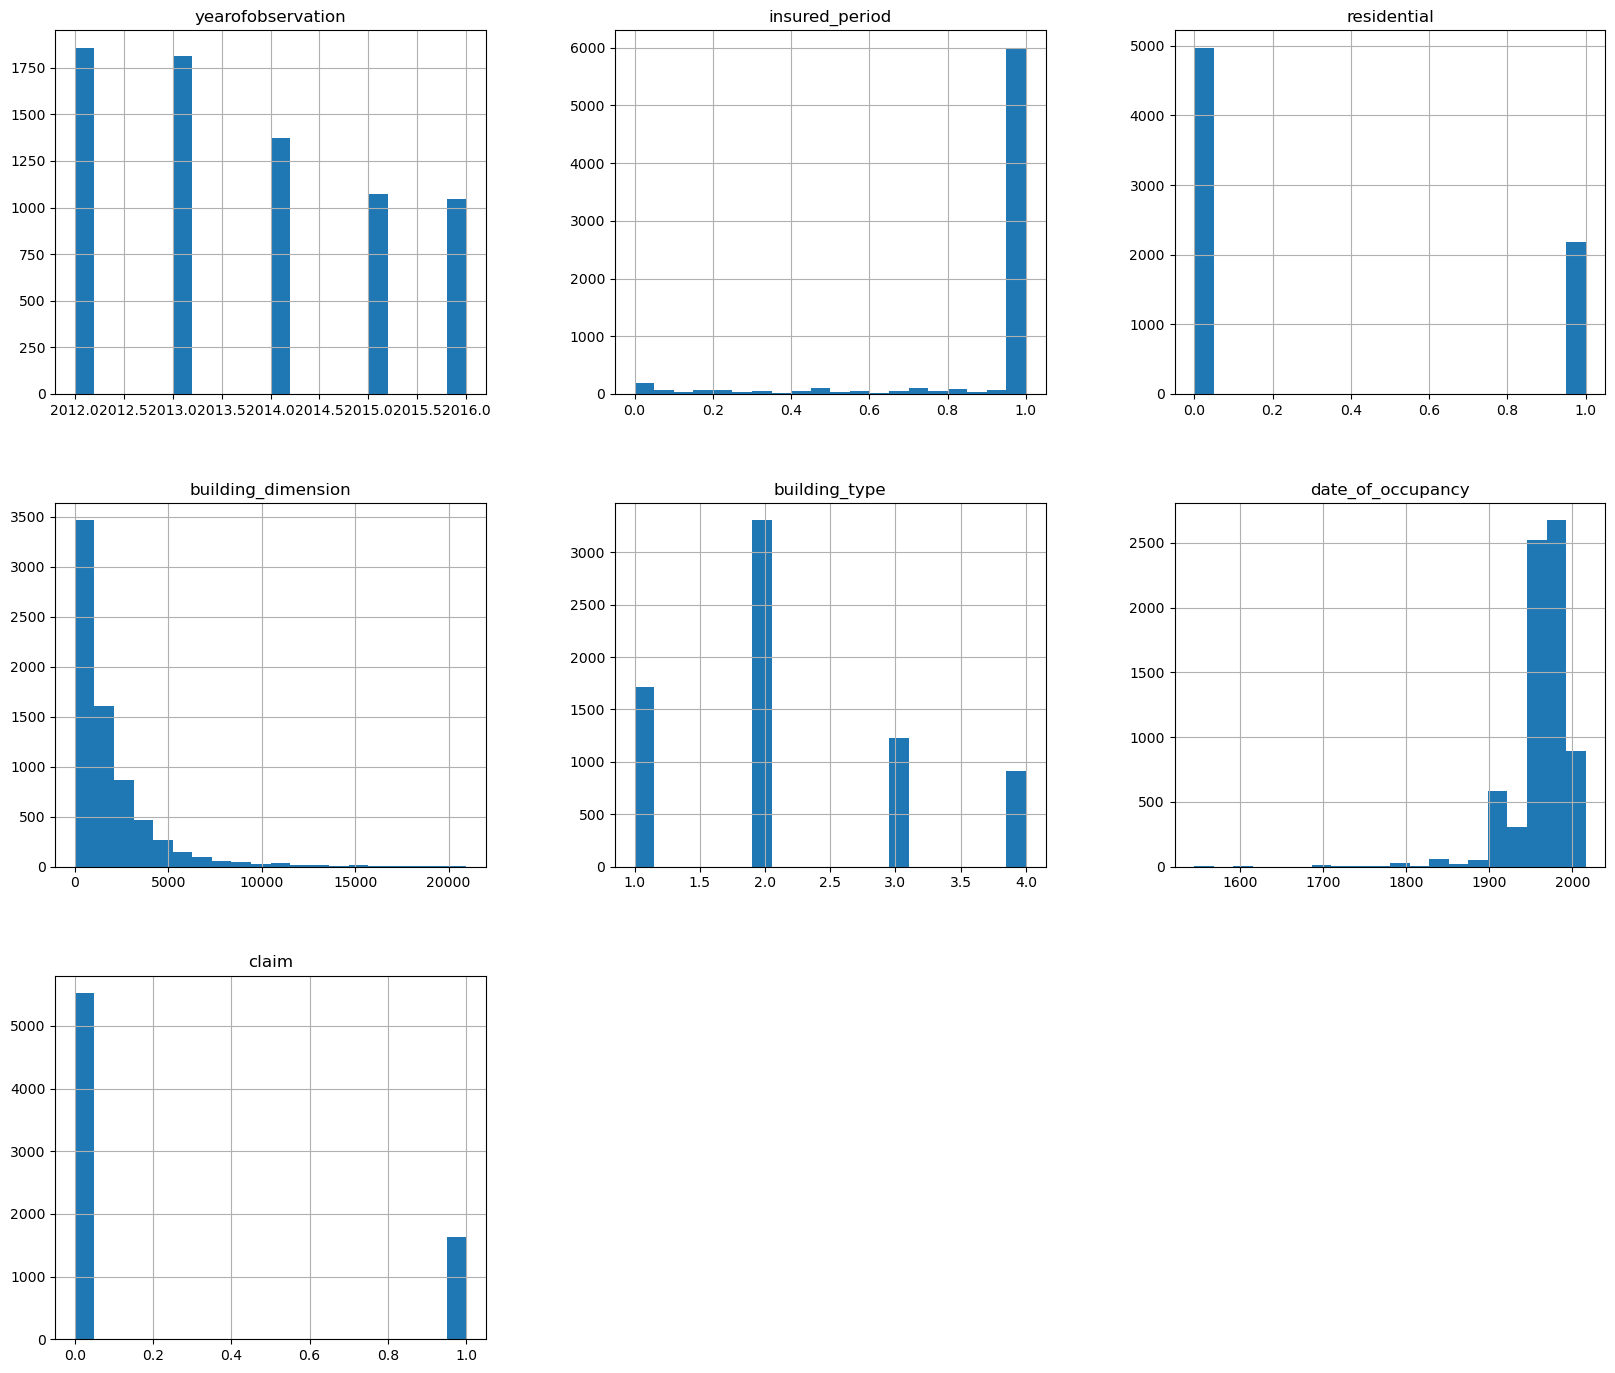

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

train_data.hist(bins=20, figsize=(20, 17))
plt.show()

### 2. Feature Selection:

In [83]:
# Removing columns customer_id, numberofwindows, geo_code due to the values they hold
columns = ['customer_id','numberofwindows','geo_code']
train_data.drop(columns=columns, axis=1, inplace=True)
test_data.drop(columns=columns_to_drop, axis=1, inplace=True)


In [84]:
# Encoding the catedorical  variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
columns = ["building_painted", "building_fenced", "garden", "settlement"]
for column in columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.fit_transform(test_data[column])
    
train_data.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,claim
0,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0
1,2015,1.0,0,1,0,0,0,490.0,1,1850.0,0
2,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0
3,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0
4,2014,1.0,0,1,0,0,0,680.0,1,1800.0,0


In [85]:
# Identifying the most relevant features for claim prediction
x = train_data.drop(columns=['claim'])
y = train_data['claim']

#Feature selection using chi-squared statistics and ANOVA F-statistic
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Calculate chi-squared statistics for each feature
chi2_scores = chi2(x, y)[0]

# Calculate ANOVA F-statistic and p-values for each feature
f_scores = f_classif(x, y)[0]

# Combine chi-squared and ANOVA scores
combined_scores = chi2_scores + f_scores

feature_scores = pd.DataFrame({'Feature': x.columns, 'Combined_Score': combined_scores})
feature_scores = feature_scores.sort_values(by='Combined_Score', ascending=False)
feature_scores

,Feature,Combined_Score
7,building_dimension,1.678148e+06
8,building_type,1.276625e+02
1,insured_period,6.034230e+01
2,residential,4.904605e+01
5,garden,2.986619e+01
6,settlement,2.919064e+01
4,building_fenced,2.877967e+01
3,building_painted,7.971521e+00
9,date_of_occupancy,2.409386e+00
0,yearofobservation,1.919750e+00


### 3. Model Building: